In [2]:
import numpy as np

from made.manifolds import Plane
from made import visuals
from made.can import CAN

## Manifold

Create a Manifold and visualize the distance metric over it. 

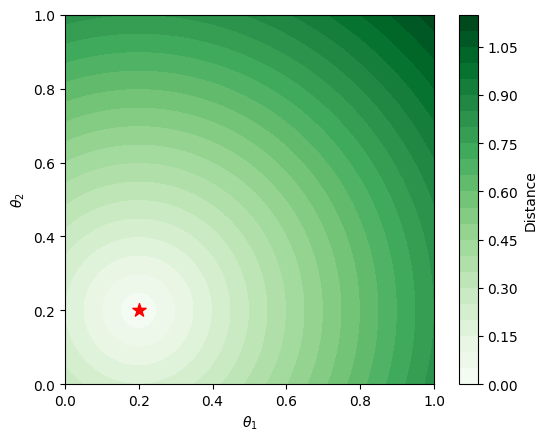

In [3]:
m = Plane()

sample = np.array([0.2, 0.2])

f, ax = visuals.plot_lattice(m, show_distances=True, distance_point=sample)


## CAN
Create a CAN and visualize the connnectivity matrix from a few sampled neurons. 

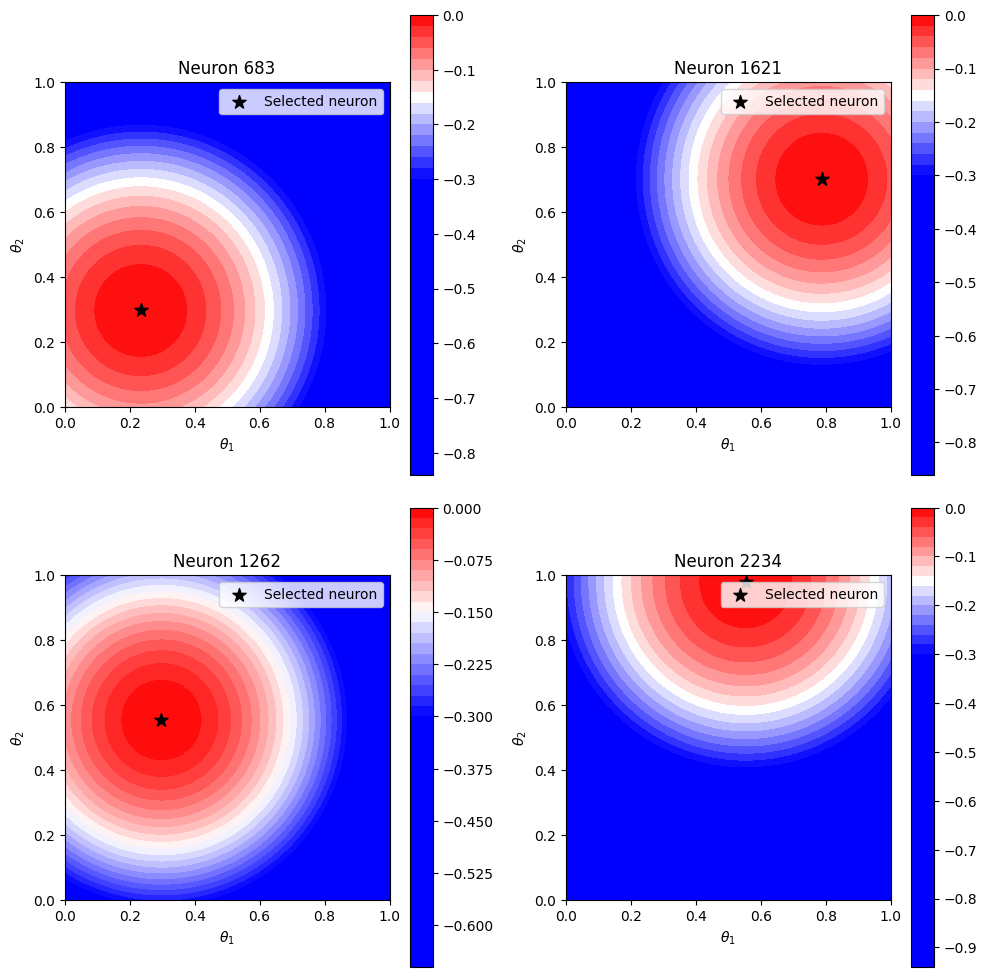

In [4]:
can = CAN.default(topology='plane')
visuals.can_connectivity(can, vmin=-0.3);